<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Uvoz biblioteka</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import ruptures as rpt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Opis atributa</h2>
</div>

* `timestamp`: Vremenska oznaka kada su podaci snimljeni
* `sound`: Vrednost zvuka u datom trenutku (moguće u decibelima)
* `pressure`: Atmosferski pritisak u datom trenutku (moguće u hektopaskalima)
* `temp`: Temperatura vazduha u datom trenutku (moguće u stepenima Celzijusa)
* `humidity`: Relativna vlažnost vazduha u datom trenutku (moguće u procentima)
* `voc`: Vrednost organskih jedinjenja u vazduhu u datom trenutku (moguće u ppm, delovima po milionu)
* `pm1.0, pm2.5, pm10`: Broj čestica u vazduhu u datom trenutku, prema veličini čestica (moguće u broju čestica po kubnom metru)
* `CO2`: Vrednost ugljen-dioksida u vazduhu u datom trenutku (moguće u ppm)

In [2]:
df = pd.read_csv('environment_data.csv')
df.head()

,timestamp,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
0,2022-11-07 00:00:01,0.881076,1012.037290,24.777757,35.996349,29466.0,26.0,36.0,45.0,421.0
1,2022-11-07 00:00:02,0.863325,1012.025698,24.762371,36.002125,29467.0,26.0,36.0,45.0,419.0
2,2022-11-07 00:00:03,0.908509,1012.083523,24.767500,36.013384,29459.0,26.0,36.0,45.0,418.0
3,2022-11-07 00:00:04,0.924645,1012.091207,24.767500,36.013384,29454.0,26.0,36.0,44.0,418.0
4,2022-11-07 00:00:05,0.896406,1012.091207,24.764935,36.013405,29458.5,26.0,36.0,44.0,416.0


In [3]:
df.dtypes

timestamp     object
sound        float64
pressure     float64
temp         float64
humidity     float64
voc          float64
pm1.0        float64
pm2.5        float64
pm10         float64
CO2          float64
dtype: object

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")

df.dtypes

timestamp    datetime64[ns]
sound               float64
pressure            float64
temp                float64
humidity            float64
voc                 float64
pm1.0               float64
pm2.5               float64
pm10                float64
CO2                 float64
dtype: object

In [5]:
df.set_index('timestamp', inplace=True)

In [6]:
df.shape

(345151, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sound,345151.0,1.035109,0.493434,0.000000,0.931100,1.035990,1.229633,3.303227
pressure,345151.0,1014.807431,2.517912,1005.339453,1013.215952,1014.020586,1015.415069,1024.071917
temp,345151.0,25.123033,1.210600,20.326285,24.470044,24.972642,25.782958,28.293446
humidity,345151.0,34.636160,2.652997,26.962989,32.984199,34.628268,36.830740,41.651724
voc,345151.0,30512.354483,1329.625356,28427.000000,29458.000000,29964.500000,31443.000000,34535.000000
pm1.0,345151.0,49.980410,27.035828,20.000000,33.000000,38.000000,59.000000,270.500000
pm2.5,345151.0,68.674444,31.107893,30.000000,48.000000,54.000000,85.000000,279.500000
pm10,345151.0,79.883421,30.668957,33.000000,61.000000,68.000000,93.000000,428.000000
CO2,344264.0,442.465660,28.831611,400.000000,418.000000,440.000000,462.000000,562.000000


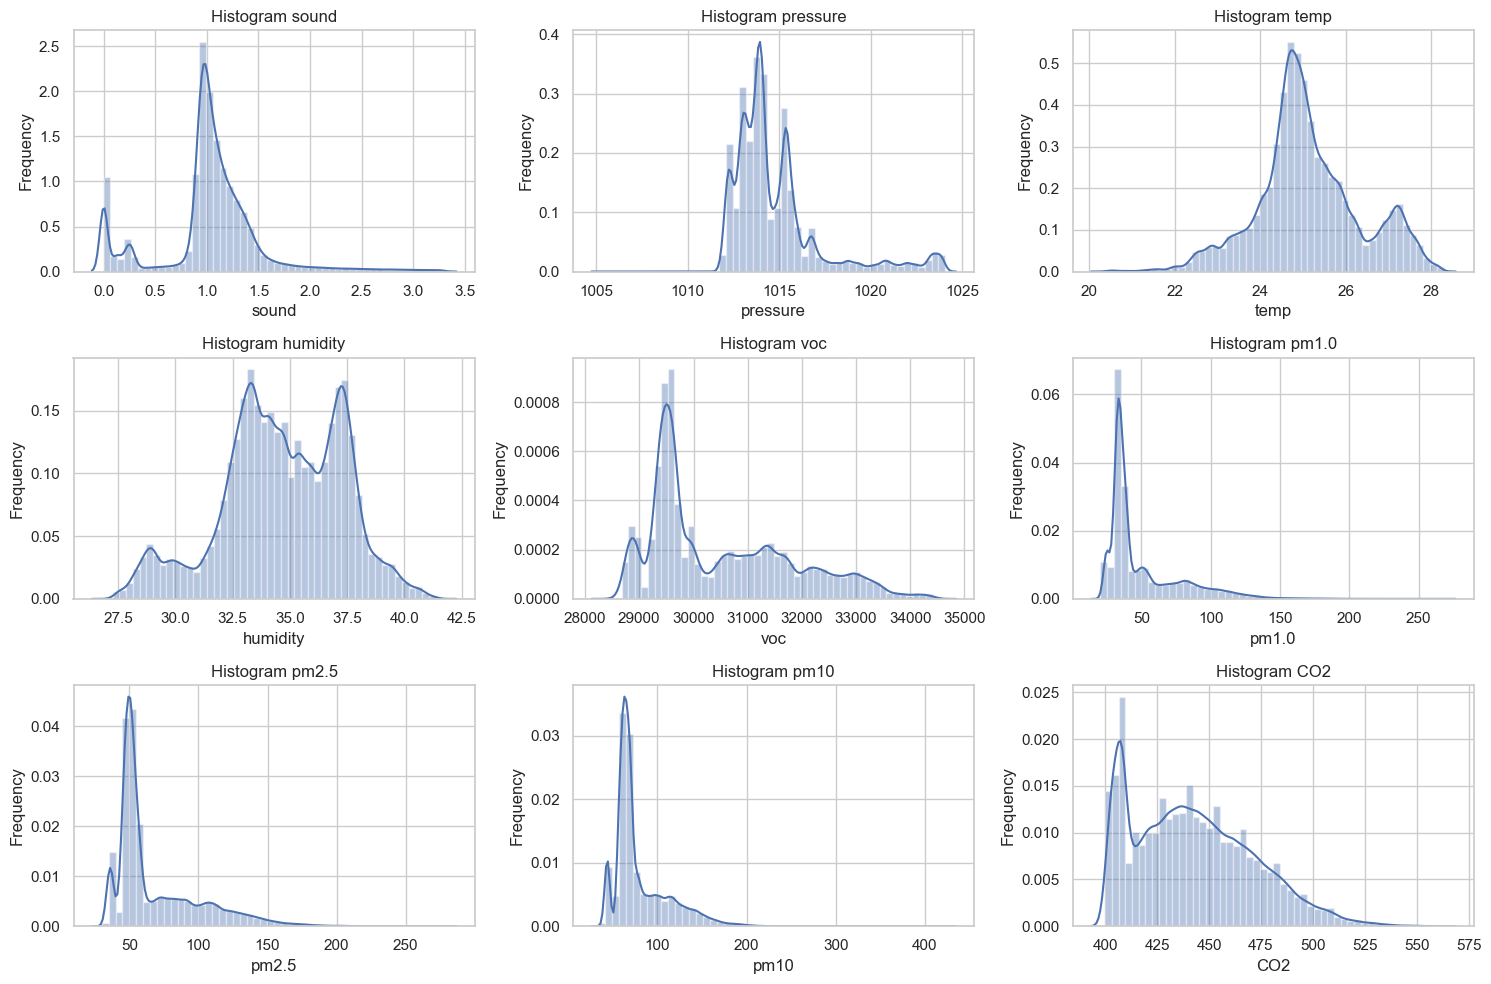

In [8]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_ylabel('Frequency')
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Histogram {}'.format(atribut))
            sns.distplot(df[atribut], ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

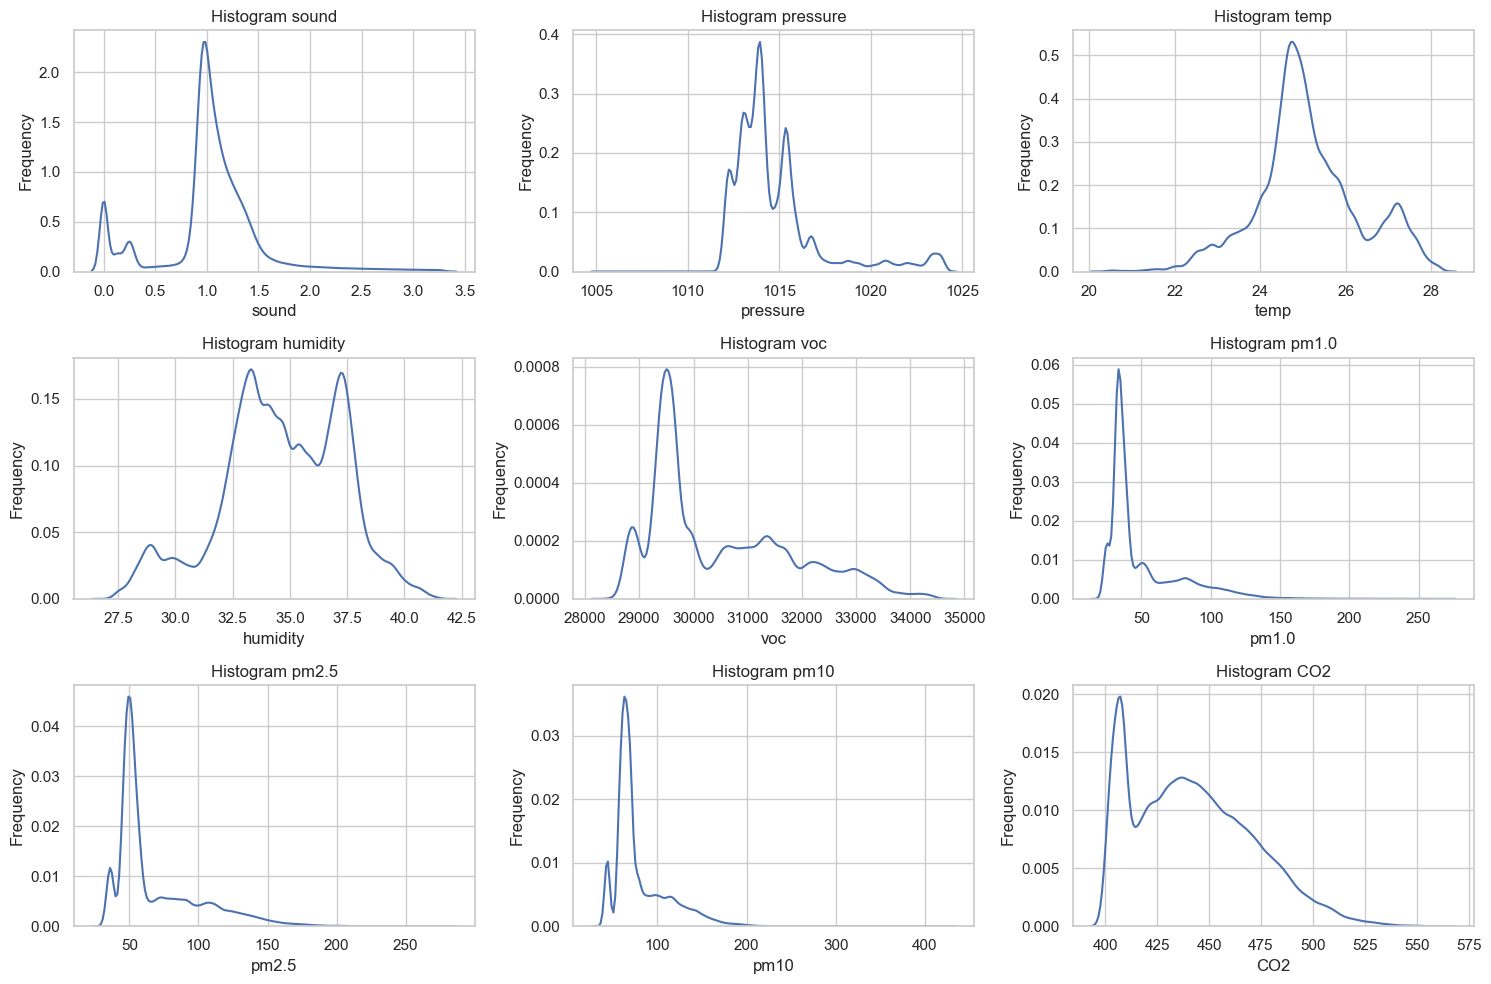

In [9]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_ylabel('Frequency')
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Histogram {}'.format(atribut))
            sns.kdeplot(df[atribut], ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

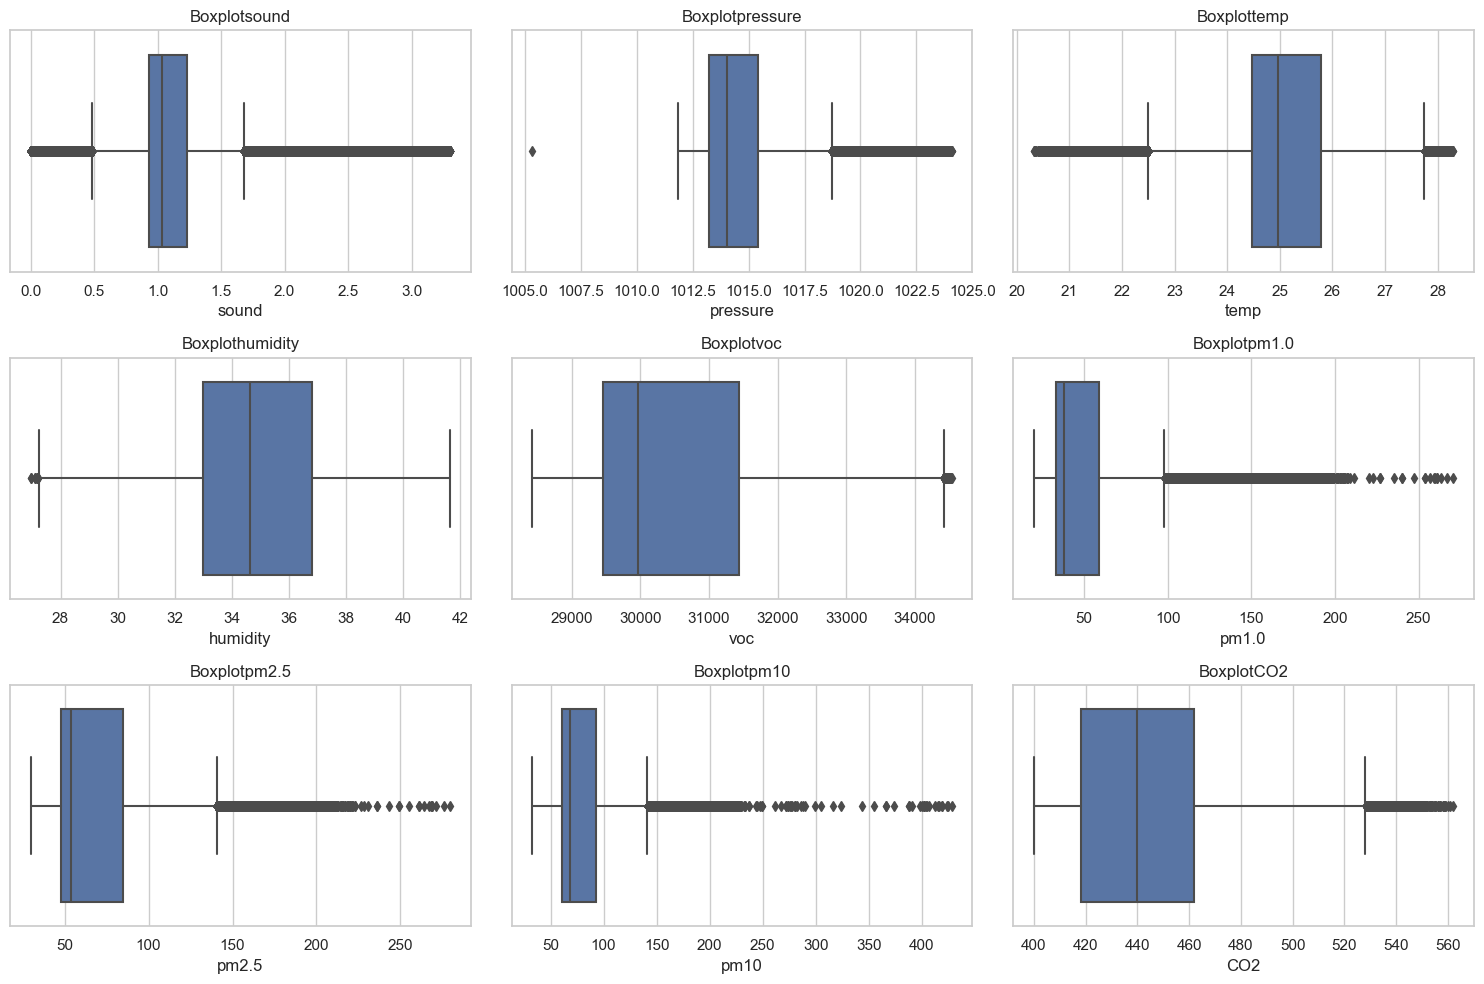

In [10]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 0

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df.columns):

            atribut = df.columns[indeks_grafikona]
            
            axs[red, kolona].set_xlabel(atribut)
            axs[red, kolona].set_title('Boxplot{}'.format(atribut))
            sns.boxplot(data=df, x = atribut ,ax=axs[red, kolona])
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

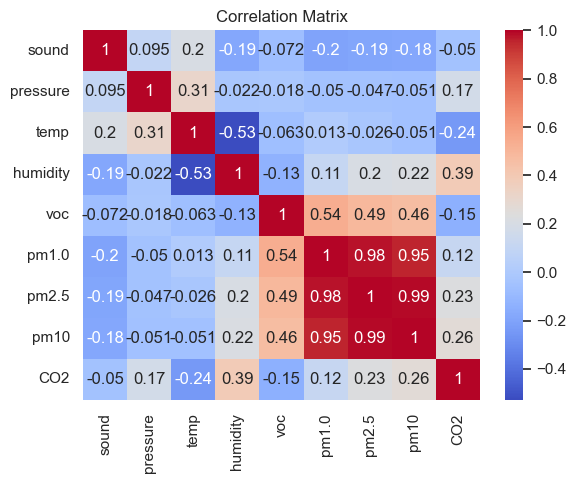

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.columns

Index(['sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0', 'pm2.5',
       'pm10', 'CO2'],
      dtype='object')

In [13]:
df_mean = df.groupby('timestamp').mean().reset_index()

df_var = df.groupby('timestamp').var().reset_index()

df_std = df.groupby('timestamp').std().reset_index()

In [14]:
df.columns

Index(['sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0', 'pm2.5',
       'pm10', 'CO2'],
      dtype='object')

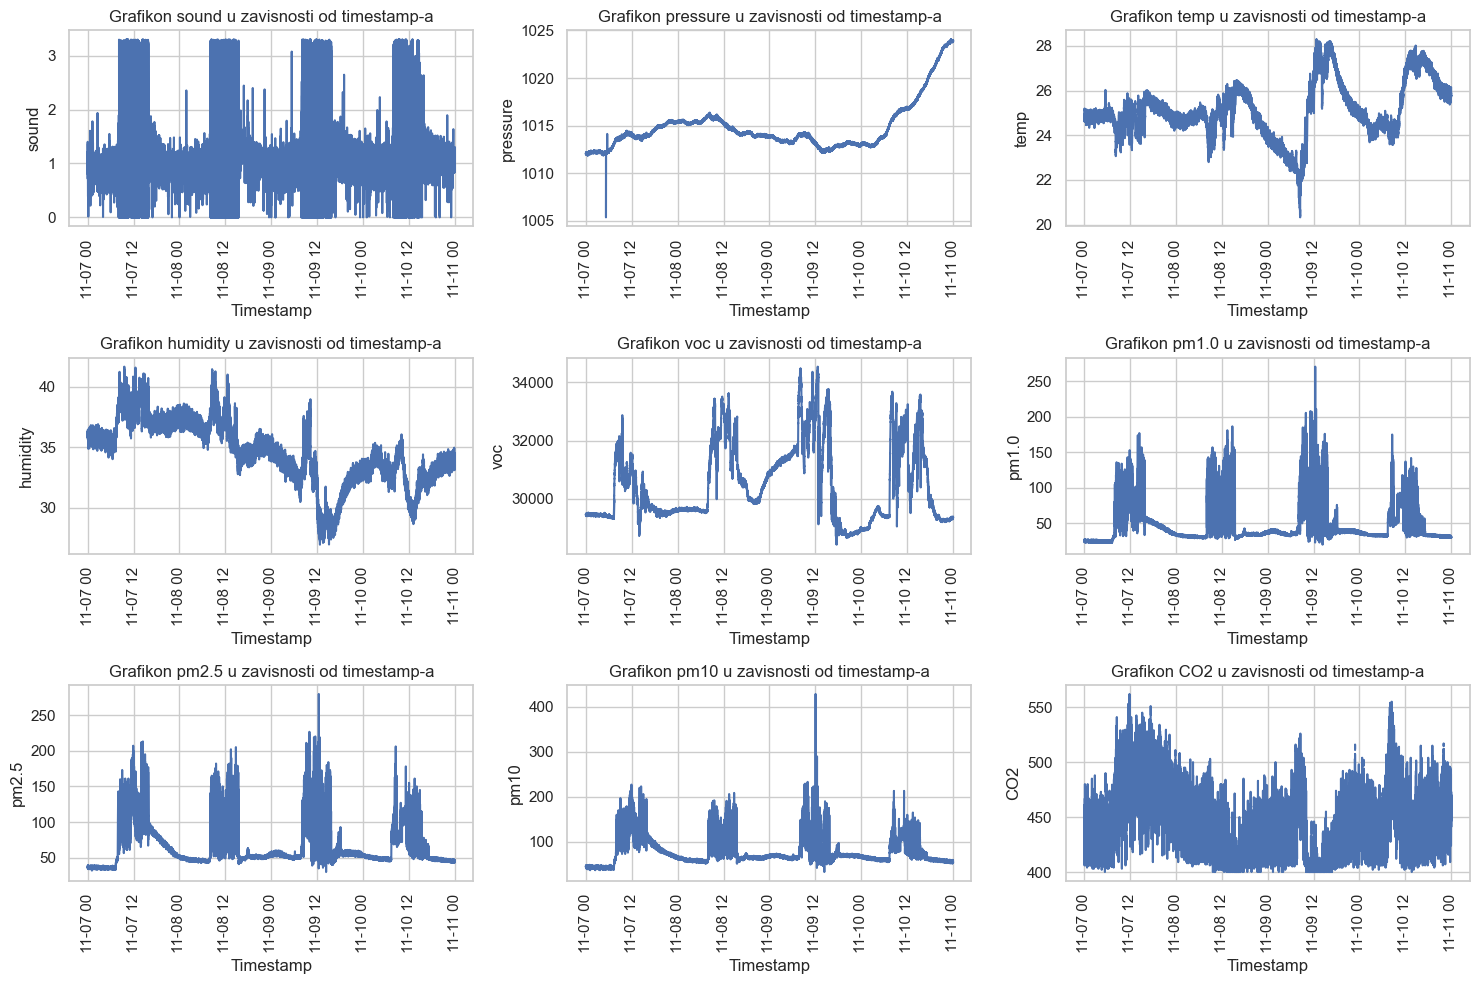

In [15]:
broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

fig, axs = plt.subplots(broj_grafikona_po_koloni, broj_grafikona_po_redu, figsize=(15, 10))

indeks_grafikona = 1

for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):
        
        if indeks_grafikona < len(df_mean.columns):

            atribut = df_mean.columns[indeks_grafikona]
            
            # nacrtajte grafikon
            axs[red, kolona].plot(df_mean['timestamp'], df_mean[atribut])
            axs[red, kolona].set_xlabel('Timestamp')
            axs[red, kolona].set_ylabel(atribut)
            axs[red, kolona].set_title('Grafikon {} u zavisnosti od timestamp-a'.format(atribut))
            axs[red, kolona].tick_params(axis='x', rotation=90)
            
            indeks_grafikona += 1
            
# podesite raspored grafikona i prikažite ih
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0', 'pm2.5',
       'pm10', 'CO2'],
      dtype='object')

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

broj_grafikona_po_redu = 3
broj_grafikona_po_koloni = 3

# stvorite praznu figuru s mrežom grafikona
fig = make_subplots(rows=broj_grafikona_po_koloni, cols=broj_grafikona_po_redu, subplot_titles=df_mean.columns[1:])

# brojač za indeks grafikona
indeks_grafikona = 1

# za svaki grafikon
for red in range(broj_grafikona_po_koloni):
    for kolona in range(broj_grafikona_po_redu):

        if indeks_grafikona < len(df_mean.columns):

            atribut = df_mean.columns[indeks_grafikona]

            # nacrtajte liniju grafikona
            fig.add_trace(go.Scatter(x=df_mean['timestamp'], y=df_mean[atribut], name=atribut),
                          row=red+1, col=kolona+1)

            # podesite osi grafikona
            fig.update_xaxes(title_text="Timestamp", row=red+1, col=kolona+1)
            fig.update_yaxes(title_text=atribut, row=red+1, col=kolona+1)

            # podesite naslov grafikona
            fig.update_layout(title_text="Grafikon {} u zavisnosti od timestamp-a".format(atribut), 
                              title_font_size=20)

            indeks_grafikona += 1

# podesite raspored grafikona i prikažite ih
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Preprocesiranje podataka</h2>
</div>

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
missing_df = df[df['CO2'].isna()]

# Compute time differences between missing values
time_diff = missing_df.index.to_series().diff()

# Check if time differences are equal to time interval
is_regular = all(time_diff == time_diff.iloc[0])

if is_regular:
    print("Missing values occur at regular intervals.")
else:
    print("Missing values do not occur at regular intervals.")

In [ ]:
df['CO2'] = df['CO2'].interpolate(method='linear')
df.isnull().sum()

In [ ]:
df['CO2'].plot();

In [ ]:
df.head()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df_resampled = df.resample('1S').mean()

In [ ]:
df_resampled.shape

In [ ]:
def IQR(data, column, threshold=1.5):
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - threshold * iqr
    upper = q3 + threshold * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

In [ ]:
num = df.shape[0]
for column in df.columns:
    outliers = IQR(df, column, threshold=1.5)
    df = df[~df.index.isin(outliers.index)]
print(num - df.shape[0])

In [ ]:
df.shape

In [ ]:
pca = PCA(n_components=2)
pca.fit(df)

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
df_pca = pd.DataFrame(pca.transform(df), columns=(["f1","f2"]))
df_pca.index = df.index

In [ ]:
df_pca.head()